**Kaggle Titanic Challenge**
<br/><br/>
website: https://www.kaggle.com/competitions/titanic/overview

In [ ]:
import pandas as pd

df_raw = pd.read_csv('/content/train.csv')
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Análise Exploratória

Cada linha no dataset acima carrega dados de um entre alguns passageiros do famoso transatlântico Titanic que naufragou em 1915. A informação mais importante está ná coluna *Survived* que diz se o passageiro saiu ou não com vida do acidente no dia 15 de Abril.

O objetivo deste trabalho é utilizar o dataset acima para elaborar modelos preditivos que possa ser utilizado para verificar se um determinado passageiro sobreviveu ou não ao acidente.

Para entender o que significa cada uma das colunas acima, é preciso acessar o website do desafio no link acima e procurar as informações sobre os dados em questão.

Estas serão exibidas a seguir:

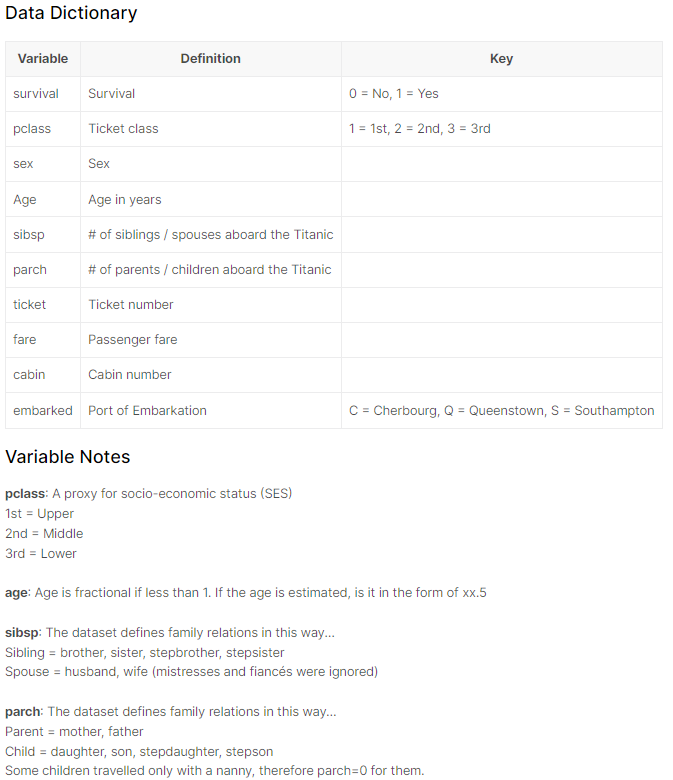

Da coluna nome, é possível derivar a coluna *title* (Mr, Mrs, Miss, entre outros), de acordo com o seguinte código:

In [ ]:
df = df_raw.copy()
titles_list = []
for name in df['Name']:
    for j in range(len(name)):
        if name[j] == ",":
            break
    for k in range(len(name)):
        if name[k] == '.':
            break
    
    titles_list.append(name[j+2:k])

df['Title'] = titles_list
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

As seguintes colunas são dispensáveis para a análise de dados e serão excluídas do dataset uma vez que não possuem correlações estatísticas com as demais variáveis:

*   Name
*   Ticket
*   Cabin
*   Embarked

Nas próximas etapas, as demais colunas serão checadas e formatadas para serem inputadas em funções de treinamento em algorítimos de machine learning.

In [ ]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,male,22.0,1,0,7.2500,Mr
1,2,1,1,female,38.0,1,0,71.2833,Mrs
2,3,1,3,female,26.0,0,0,7.9250,Miss
3,4,1,1,female,35.0,1,0,53.1000,Mrs
4,5,0,3,male,35.0,0,0,8.0500,Mr
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,Rev
887,888,1,1,female,19.0,0,0,30.0000,Miss
888,889,0,3,female,NaN,1,2,23.4500,Miss
889,890,1,1,male,26.0,0,0,30.0000,Mr


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Title            0
dtype: int64

O código executado acima buscou verificar se existem dados ausentes ou nulos, neste caso existem 177 linhas cujo a coluna *Age* está com dado considerado nulo. O tratamento pra esta questão será discutido posteriormente. Os próximos códigos irão explorar as colunas *Survived*, *Pclass* e *Sex*.

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

A coluna *Sex* será formatada de acordo com o dicionário abaixo:

*   male: 0
*   female: 1



In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

Agora, será tratado o problema da ausência de dados na coluna *Age*.

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Age', width=800, height=400)
fig.show()

O gráfico a seguir demonstra a distribuição dos dados presentes da coluna *Age* dividas por sexo (coluna *Sex* no eixo x) e por classe (coluna *Pclass* através da legenda). A conclusão é que existem diferenças na distribuição de idades em cada um destes 6 grupos.

In [ ]:
fig = px.box(df.sort_values(by='Pclass'), x='Sex', y='Age', color='Pclass', points="all")
fig.show()

A seguinte tabela mostra aonde estão os dados ausentes em cada um dos 6 grupos criados no gráfico acima.

In [ ]:
pd.DataFrame(df[df['Age'].isnull()].groupby(by=['Pclass', 'Sex']).count()['PassengerId'])

PassengerId
Pclass Sex             
1      0             21
       1              9
2      0              9
       1              2
3      0             94
       1             42

A decisão para substituir os dados ausentes é utilizar o valor da mediana para cada grupo incluindo classe e sexo. o seguinte código calcula a mediana para cada grupo em questão:

In [ ]:
median = df.groupby(by=['Pclass', 'Sex']).median()['Age']
pd.DataFrame(median)

Age
Pclass Sex      
1      0    40.0
       1    35.0
2      0    30.0
       1    28.0
3      0    25.0
       1    21.5

O próximo código atribui a mediana de idade de cada grupo nos espaços em branco.

In [ ]:
l = df[df['Age'].isnull()].index.to_list() #lista de índices no dataset "df" cujo valor 'Age' é nulo.

for i in l:
    df.loc[i, 'Age'] = median[df.loc[i, 'Pclass'], df.loc[i, 'Sex']]

df.loc[l] #Os dados a serem exibidos são apenas aqueles que acabaram de ser atribuidos.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
5,6,0,3,0,25.0,0,0,8.4583,Mr
17,18,1,2,0,30.0,0,0,13.0000,Mr
19,20,1,3,1,21.5,0,0,7.2250,Mrs
26,27,0,3,0,25.0,0,0,7.2250,Mr
28,29,1,3,1,21.5,0,0,7.8792,Miss
...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,25.0,0,0,7.2292,Mr
863,864,0,3,1,21.5,8,2,69.5500,Miss
868,869,0,3,0,25.0,0,0,9.5000,Mr
878,879,0,3,0,25.0,0,0,7.8958,Mr


Desta forma todos os dados (os que já estavam presentes e os que foram atribuidos) são plotados novamente no histograma e no modelo boxplot.

In [ ]:
df['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
fig = px.histogram(df, x='Age', width=800, height=400)
fig.show()

É possível constatar que o novo histograma apresenta uma distorção na coluna de idade de 24 a 25.9 anos. Isso se deve ao fato de que 94 valores de 24 anos foram adicionados pois eles representam as 94 pessoas do sexo masculino da terceira classe cujo valor de idade estava em branco.

Vale dizer que o valor da média para idade caiu de 29,7 para 29,1 (cerca de 2%) e o desvio padrão caiu de 14,5 para 13,3 (cerca de 8%)

In [ ]:
fig = px.box(df.sort_values(by='Pclass'), x='Sex', y='Age', color='Pclass', points="all")
fig.show()

No próximo passo, serão exibidas as distribuições das colunas: 


*   SibSp: representa a quantidade de irmãos e cônjuge que viajam junto com o passageiro em questão;
*   Parch: representa se o passageiro está viajando com os pais ou com filhos e a quantidade deles;

Estas duas colunas são representas como números inteiros maiores ou iguais a zero representando a quantidade de familiares em cada categoria.

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
fig = px.histogram(df, x='SibSp', width=800, height=400)
fig.show()

In [ ]:
df['SibSp'].std()

1.1027434322934317

In [ ]:
df['SibSp'].mean()

0.5230078563411896

In [ ]:
fig = px.box(df, y='SibSp', points="all", width=800, height=400)
fig.show()

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
fig = px.histogram(df, x='Parch', width=800, height=400)
fig.show()

In [ ]:
fig = px.box(df, y='Parch', points="all", width=800, height=400)
fig.show()

Não serão realizadas modificações nas colunas discutidas acima, uma vez que são números inteiros dentro da faixa de 0 a 10, e portanto, não devem influenciar o modelo matemático com valores extremados.

A última coluna a ser estudada será *Fare* que representa o custo da tarifa de cada um dos passageiros.

In [ ]:
fig = px.histogram(df, x='Fare', nbins=500)
fig.show()

In [ ]:
fig = px.box(df, y='Fare', points="all", width=800, height=400)
fig.show()

Como os dados que estão sendo estudados tem como objetivo serem utilizados para treinar um modelo de machine learning, é preciso que modificações sejam feitas em algumas features.

Os dados cujo valor *Fare* estão acima de 65 serão excluído pois serão classificados como outliers e podem deixar o modelo enviesado. O valor de 65 representa o limite do último quartil (q3) que está localizado a uma distancia de 2,7 desvios padrões da média da amostra.

In [ ]:
df[df['Fare'] > 65] #Dados a serem excluídos

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
1,2,1,1,1,38.0,1,0,71.2833,Mrs
27,28,0,1,0,19.0,3,2,263.0000,Mr
31,32,1,1,1,35.0,1,0,146.5208,Mrs
34,35,0,1,0,28.0,1,0,82.1708,Mr
52,53,1,1,1,49.0,1,0,76.7292,Mrs
...,...,...,...,...,...,...,...,...,...
846,847,0,3,0,25.0,8,2,69.5500,Mr
849,850,1,1,1,35.0,1,0,89.1042,Mrs
856,857,1,1,1,45.0,1,1,164.8667,Mrs
863,864,0,3,1,21.5,8,2,69.5500,Miss


In [ ]:
df = df[df['Fare'] <= 65].reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,0,22.0,1,0,7.2500,Mr
1,3,1,3,1,26.0,0,0,7.9250,Miss
2,4,1,1,1,35.0,1,0,53.1000,Mrs
3,5,0,3,0,35.0,0,0,8.0500,Mr
4,6,0,3,0,25.0,0,0,8.4583,Mr
...,...,...,...,...,...,...,...,...,...
770,887,0,2,0,27.0,0,0,13.0000,Rev
771,888,1,1,1,19.0,0,0,30.0000,Miss
772,889,0,3,1,21.5,1,2,23.4500,Miss
773,890,1,1,0,26.0,0,0,30.0000,Mr


A feature *Title* apresenta variáveis categóricas nominais. É preciso converter essa feature em indicadores numéricos. A seguir serão apresentadas as variáveis em questão:

In [ ]:
df['Title'].value_counts()

Mr          478
Miss        143
Mrs          97
Master       36
Rev           6
Dr            5
Major         2
Col           2
Don           1
Ms            1
Lady          1
Sir           1
Mlle          1
Jonkheer      1
Name: Title, dtype: int64

Apenas serão considerados os tres principais títulos (*Mr*, *Miss* e *Mrs*), uma vez que o tamanho da amostra dos demais é muito pequena.

In [ ]:
df = df.join(pd.get_dummies(df['Title'], prefix='Title')[['Title_Mr', 'Title_Miss', 'Title_Mrs']]).drop(['Title'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Mr,Title_Miss,Title_Mrs
0,1,0,3,0,22.0,1,0,7.2500,1,0,0
1,3,1,3,1,26.0,0,0,7.9250,0,1,0
2,4,1,1,1,35.0,1,0,53.1000,0,0,1
3,5,0,3,0,35.0,0,0,8.0500,1,0,0
4,6,0,3,0,25.0,0,0,8.4583,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
770,887,0,2,0,27.0,0,0,13.0000,0,0,0
771,888,1,1,1,19.0,0,0,30.0000,0,1,0
772,889,0,3,1,21.5,1,2,23.4500,0,1,0
773,890,1,1,0,26.0,0,0,30.0000,1,0,0


Todas as etapas discutidas na análise exploratória podem ser resumidas em um função do python que será utilizada caso seja necessário adicionar novos dados de treino ou teste.

In [ ]:
def get_data(df_raw):
    df = df_raw.copy()

    #Gerar feature Title:
    titles_list = []
    for name in df['Name']:
        for j in range(len(name)):
            if name[j] == ",":
                break
        for k in range(len(name)):
            if name[k] == '.':
                break
        
        titles_list.append(name[j+2:k])

    df['Title'] = titles_list

    #Deletar colunas desnecessárias:
    df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

    #Mapear feature Sex:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    #Preencher valores de idade nulos:
    median = df.groupby(by=['Pclass', 'Sex']).median()['Age']
    l = df[df['Age'].isnull()].index.to_list() #lista de índices no dataset "df" cujo valor 'Age' é nulo.
    for i in l:
        df.loc[i, 'Age'] = median[df.loc[i, 'Pclass'], df.loc[i, 'Sex']]

    #Excluir valores de Fare acima de 65:
    df = df[df['Fare'] <= 65].reset_index(drop=True)
    
    #Processamento dos dados categóricos:
    df = df.join(pd.get_dummies(df['Title'], prefix='Title')[['Title_Mr', 'Title_Miss', 'Title_Mrs']]).drop(['Title'], axis=1)

    return df

get_data(df_raw)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Mr,Title_Miss,Title_Mrs
0,1,0,3,0,22.0,1,0,7.2500,1,0,0
1,3,1,3,1,26.0,0,0,7.9250,0,1,0
2,4,1,1,1,35.0,1,0,53.1000,0,0,1
3,5,0,3,0,35.0,0,0,8.0500,1,0,0
4,6,0,3,0,25.0,0,0,8.4583,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
770,887,0,2,0,27.0,0,0,13.0000,0,0,0
771,888,1,1,1,19.0,0,0,30.0000,0,1,0
772,889,0,3,1,21.5,1,2,23.4500,0,1,0
773,890,1,1,0,26.0,0,0,30.0000,1,0,0


### **Árvore de Decisão**

O primeiro modelo a ser explorado será o de árvore de decisão, que embora seja simples, o interesse é apenas no processo de tunagem de hiperparâmetros e visualização gráfica da árvore em questão.

O primeiro modelo, com hiperparâmetros defaut será exibido a seguir:

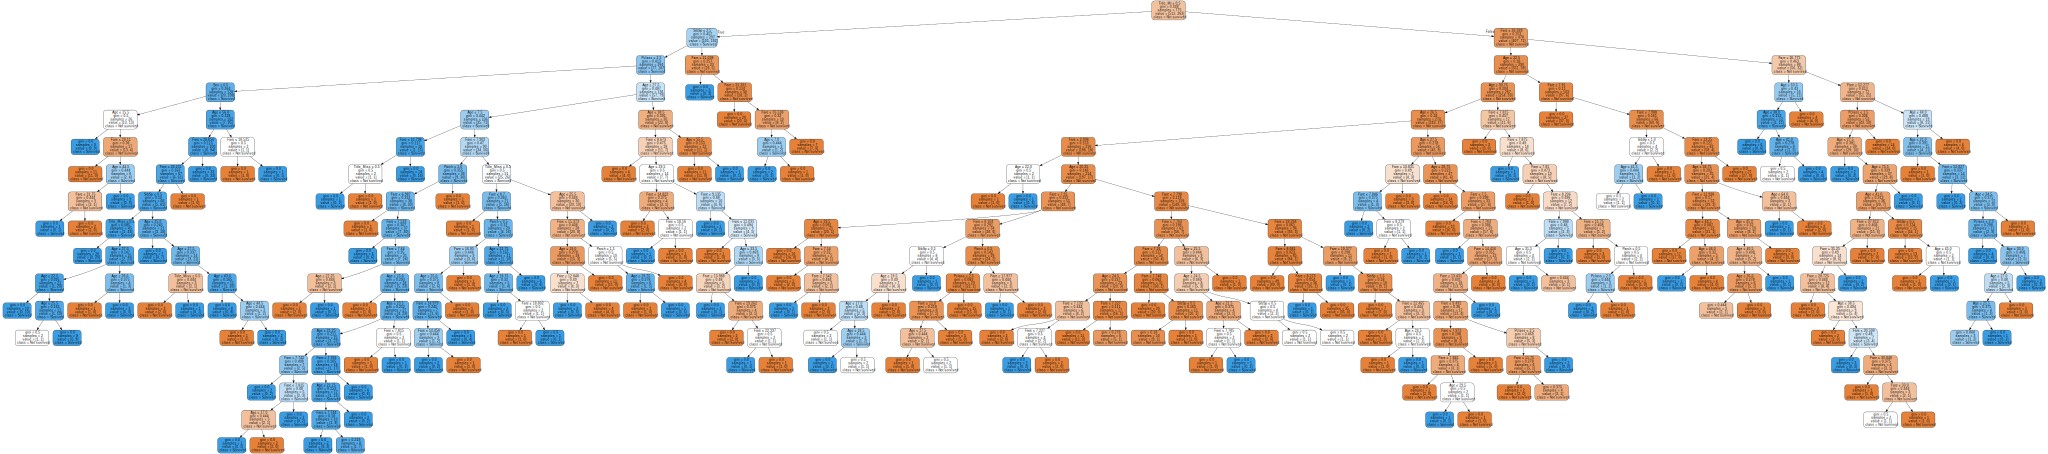

In [ ]:
X_train = df.drop(['PassengerId', 'Survived'], axis=1)
y_train = df['Survived']

from sklearn import tree
random_state = 1
clf_tree = tree.DecisionTreeClassifier(random_state=random_state)
clf_tree = clf_tree.fit(X_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None, feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

A próxima tabela apresenta o resultado de uma função da biblioteca Scikit-learn (https://scikit-learn.org/stable/) que permite expressar a importância de cada feature no processo de construção da árvore de decisão.

In [ ]:
clf_tree.feature_names_in_

pd.DataFrame({'Feature': clf_tree.feature_names_in_, 'Importance': clf_tree.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,Fare,0.298099
1,Title_Mr,0.277116
2,Age,0.252459
3,SibSp,0.064239
4,Pclass,0.044123
5,Sex,0.023524
6,Title_Miss,0.021396
7,Parch,0.019044
8,Title_Mrs,0.000000


Não se costuma realizar uma verificação de score utilizando os dados de treino, uma vez que não se usa os dados de treino na função de teste. No lugar disso, costuma-se fazer uma validação cruzada para os dados de treino (https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
clf_tree = tree.DecisionTreeClassifier(random_state=random_state)

scores = cross_val_score(clf_tree, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
scores

array([0.76129032, 0.7483871 , 0.8       , 0.80645161, 0.77419355])

Desta forma, pode-se explorar a tunagem de hiperparâmetros, começando por *max_depth*:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [i for i in range(1, 100)]}

clf_tree = tree.DecisionTreeClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

clf_tree_grid_search = GridSearchCV(clf_tree, param_grid, cv=cv,
                                    scoring='accuracy',
                                    return_train_score=True,
                                    verbose=True,
                                    n_jobs=-1)
clf_tree_grid_search.fit(X_train, y_train)

fig = px.scatter(pd.DataFrame({'max_depth': [i for i in range(1, 100)],
                               'mean_test_score': clf_tree_grid_search.cv_results_['mean_test_score']}),
                 x='max_depth',
                 y='mean_test_score')
fig.show()

Fitting 5 folds for each of 99 candidates, totalling 495 fits


O código utilizado na última célula é encapsulado em uma função que plota o score médio da validação cruzada em função da variação de apenas um hiperparâmetro. Desta forma é possível visualizar o comportamento do modelo em diversos hiperparâmetros.

In [ ]:
def plot_mean_test_score(param_grid):
    if len(param_grid) != 1:
        print('Wrong dictionary lenght')
        return

    param_name = list(param_grid.keys())[0]
    param_list = param_grid[list(param_grid.keys())[0]]

    clf_tree = tree.DecisionTreeClassifier(random_state=random_state)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    clf_tree_grid_search = GridSearchCV(clf_tree, param_grid, cv=cv,
                                        scoring='accuracy',
                                        return_train_score=True,
                                        verbose=True,
                                        n_jobs=-1)
    clf_tree_grid_search.fit(X_train, y_train)

    fig = px.scatter(pd.DataFrame({param_name: param_list,
                                  'mean_test_score': clf_tree_grid_search.cv_results_['mean_test_score']}),
                    x=param_name,
                    y='mean_test_score')
    fig.show()

plot_mean_test_score({'min_samples_split': range(2, 200)})

Fitting 5 folds for each of 198 candidates, totalling 990 fits


In [ ]:
plot_mean_test_score({'min_samples_leaf': range(1, 200)})

Fitting 5 folds for each of 199 candidates, totalling 995 fits


In [ ]:
plot_mean_test_score({'min_weight_fraction_leaf': [0.01*i for i in range(0,50)]})

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
plot_mean_test_score({'max_features': range(1,10)})

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
plot_mean_test_score({'min_impurity_decrease': [0.01*i for i in range(0,100)]})

Fitting 5 folds for each of 100 candidates, totalling 500 fits


O hiperparâmetro *ccp_alpha* se refere a função *Minimal Cost-Complexity Pruning* (https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). Essa função permite eliminar os níveis mais distantes da raíz da árvore com o objetivo de evitar *overfit*.

In [ ]:
ccp_alpha_list = clf_tree.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 0.00000000e+00, 2.34604106e-05, 5.37634409e-05,
       7.16845878e-05, 1.51357487e-04, 2.15053763e-04, 2.15053763e-04,
       2.58064516e-04, 2.78304870e-04, 3.22580645e-04, 3.92706872e-04,
       4.30107527e-04, 4.30107527e-04, 5.37634409e-04, 5.83717358e-04,
       6.45161290e-04, 6.88172043e-04, 7.62463343e-04, 7.64635603e-04,
       7.74193548e-04, 7.82013685e-04, 8.19252432e-04, 8.24714115e-04,
       8.60215054e-04, 9.30037704e-04, 9.38258758e-04, 9.58525346e-04,
       9.67741935e-04, 9.67741935e-04, 9.67741935e-04, 1.03225806e-03,
       1.03225806e-03, 1.05933891e-03, 1.10599078e-03, 1.14791240e-03,
       1.15792600e-03, 1.16563484e-03, 1.17104906e-03, 1.17232252e-03,
       1.19026472e-03, 1.20278504e-03, 1.20430108e-03, 1.20967742e-03,
       1.22477143e-03, 1.23334730e-03, 1.29468031e-03, 1.46339888e-03,
       1.48694316e-03, 1.56211393e-03, 1.57296467e-03, 1.60573477e-03,
       1.60955000e-03, 1.63504725e-03, 1.64874552e-03, 1.72043011e-03,
      

In [ ]:
plot_mean_test_score({'ccp_alpha': ccp_alpha_list})

Fitting 5 folds for each of 75 candidates, totalling 375 fits


A função *RandomizedSearchCV* vai buscar os melhores hiperparâmetros dentro de uma lista com vários deles por meio algumas validações cruzadas realizadas randomicamente, as faixas utilizadas no dicionário *param_grid* são baseadas nos gráficos plotados acima:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': range(1, 20, 2),
              'min_samples_split': range(0, 150, 10),
              'min_samples_leaf': range(1, 100, 10),
              'min_weight_fraction_leaf': [0.01*i for i in range(0,50, 5)],
              'max_features': range(1,10),
              'min_impurity_decrease': [0.01*i for i in range(0,20)],
              'ccp_alpha': ccp_alpha_list
              }

clf_tree = tree.DecisionTreeClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

clf_tree_rnd_search = RandomizedSearchCV(clf_tree, param_grid, cv=cv,
                                          n_iter=10**4,
                                          scoring='accuracy',
                                          return_train_score=True,
                                          verbose=True,
                                          n_jobs=-1)
clf_tree_rnd_search.fit(X_train, y_train)
clf_tree_rnd_search.best_estimator_

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3270 fits failed out of a total of 50000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0];

DecisionTreeClassifier(ccp_alpha=0.0017204301075268817, max_depth=15,
                       max_features=4, min_samples_split=50, random_state=1)

In [ ]:
scores = cross_val_score(clf_tree_rnd_search.best_estimator_, X_train, y_train, scoring='accuracy', n_jobs=-1)
scores

array([0.78064516, 0.74193548, 0.81935484, 0.82580645, 0.78709677])

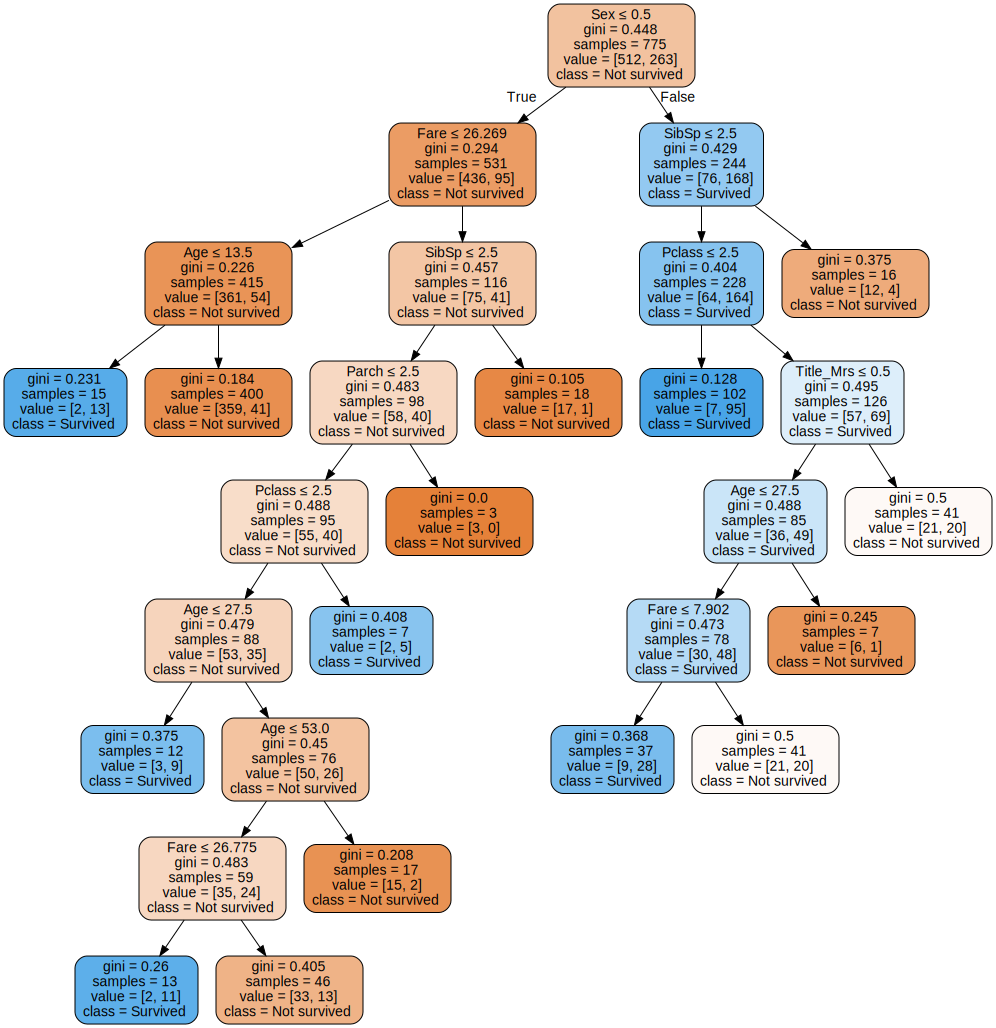

In [ ]:
dot_data = tree.export_graphviz(clf_tree_rnd_search.best_estimator_, out_file=None, feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
pd.DataFrame({'Feature': clf_tree_rnd_search.best_estimator_.feature_names_in_, 'Importance': clf_tree_rnd_search.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,Sex,0.541795
1,Age,0.158534
2,Fare,0.114146
3,Pclass,0.111695
4,SibSp,0.064683
5,Parch,0.006434
6,Title_Mrs,0.002713
7,Title_Mr,0.000000
8,Title_Miss,0.000000


O próximo modelo a ser construído vai utilizar os valores máximos encontrados nos gráficos acima e novas validações cruzadas serão reproduzidas:

In [ ]:
clf_tree_max_graph = tree.DecisionTreeClassifier(max_depth=8,
                                                 min_samples_split=21,
                                                 min_samples_leaf=5,
                                                 min_weight_fraction_leaf=0.01,
                                                 max_features=8,
                                                 min_impurity_decrease=0.01,
                                                 ccp_alpha=0.0023,
                                                 random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
scores = cross_val_score(clf_tree_max_graph,
                         X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
scores

array([0.8       , 0.73548387, 0.83870968, 0.82580645, 0.78064516])

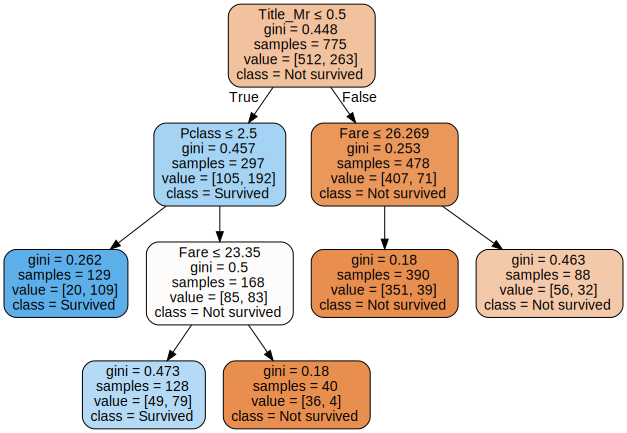

In [ ]:
clf_tree_max_graph.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_tree_max_graph, out_file=None, feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
pd.DataFrame({'Feature': clf_tree_max_graph.feature_names_in_, 'Importance': clf_tree_max_graph.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,Title_Mr,0.672399
1,Fare,0.194571
2,Pclass,0.133031
3,Sex,0.000000
4,Age,0.000000
5,SibSp,0.000000
6,Parch,0.000000
7,Title_Miss,0.000000
8,Title_Mrs,0.000000


### Random Forest

Uma vez que diversos hiperparâmetros da árvore de decisão foram estudados. O modelo de random forest será introduzido neste trabalho:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
scores = cross_val_score(clf_rf, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
scores

array([0.81290323, 0.8       , 0.8       , 0.83870968, 0.80645161])

Reescrevendo a função *plot_mean_test_score* para modelos generalizados:

In [ ]:
def plot_mean_test_score(clf, param_grid):
    if len(param_grid) != 1:
        print('Wrong dictionary lenght')
        return

    param_name = list(param_grid.keys())[0]
    param_list = param_grid[list(param_grid.keys())[0]]

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    clf_tree_grid_search = GridSearchCV(clf, param_grid, cv=cv,
                                        scoring='accuracy',
                                        return_train_score=True,
                                        verbose=True,
                                        n_jobs=-1)
    clf_tree_grid_search.fit(X_train, y_train)

    fig = px.scatter(pd.DataFrame({param_name: param_list,
                                  'mean_test_score': clf_tree_grid_search.cv_results_['mean_test_score']}),
                    x=param_name,
                    y='mean_test_score')
    fig.show()

plot_mean_test_score(RandomForestClassifier(random_state=random_state),
                     {'n_estimators': range(1, 500, 5)})

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
clf_rf = RandomForestClassifier(max_depth=4,
                                min_samples_split=22,
                                min_samples_leaf=9,
                                min_weight_fraction_leaf=0.01,
                                max_features=6,
                                min_impurity_decrease=0.01,
                                random_state=random_state)

plot_mean_test_score(clf_rf, {'n_estimators': range(1, 500, 5)})

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### XGBoost

Para encerrar o trabalho, será mostrado o modelo *XGBoost*, o hiperparâmetro *learning_rate* será otimizado e uma validação cruzada irá atestar a acurácia do modelo.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_xgb = GradientBoostingClassifier(random_state=random_state)
clf_xgb

GradientBoostingClassifier(random_state=1)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
scores = cross_val_score(clf_xgb, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
scores

array([0.82580645, 0.77419355, 0.84516129, 0.81935484, 0.80645161])

In [ ]:
plot_mean_test_score(clf_xgb, {'n_estimators': range(1, 500, 5)})

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
plot_mean_test_score(clf_xgb, {'learning_rate': [0.01*i for i in range(1,100)]})

Fitting 5 folds for each of 99 candidates, totalling 495 fits


In [ ]:
clf_xgb = GradientBoostingClassifier(random_state=1, learning_rate=0.11)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

scores = cross_val_score(clf_xgb, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
scores

array([0.81935484, 0.78709677, 0.85806452, 0.82580645, 0.79354839])

### Conclusão:

Foram estudados 5 modelos de aprendizado de máquina:


1.   Árvore de decisão com hiperparâmetros defaut
2.   Árvore de decisão gerada através da função *RandomizedSearchCV*
3.   Árvore de decisão gerada através de diversas otimizações singulares de parâmetros isolados
4.   Random Forest com hiperparâmetros identicos ao modelo 3
5.   XGBoost com otimização do hiperparâmetro *learning_rate*

Como já era esperado, o modelo XGBoost apresentou os melhores escores quando é executada a validação cruzada.

In [ ]:
def get_cross_val_score(clf):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    
    print(score)
    print('Mean: ', score.mean())
    print('Std: ', score.std())

get_cross_val_score(clf_tree)

[0.76129032 0.7483871  0.8        0.80645161 0.77419355]
Mean:  0.7780645161290323
Std:  0.022199549076239035


In [ ]:
get_cross_val_score(clf_tree_rnd_search.best_estimator_)

[0.81290323 0.76129032 0.77419355 0.87096774 0.81935484]
Mean:  0.8077419354838711
Std:  0.03858042938768015


In [ ]:
get_cross_val_score(clf_tree_max_graph)

[0.8        0.73548387 0.83870968 0.82580645 0.78064516]
Mean:  0.7961290322580645
Std:  0.03640447994752488


In [ ]:
get_cross_val_score(clf_rf)

[0.79354839 0.8        0.83225806 0.82580645 0.78064516]
Mean:  0.8064516129032258
Std:  0.01956871082335884


In [ ]:
get_cross_val_score(clf_xgb)

[0.81935484 0.78709677 0.85806452 0.82580645 0.79354839]
Mean:  0.8167741935483871
Std:  0.025350816392759337


### Discussões


*   Tunagem de hiperparâmetros e random forest apresentam uma leve melhoria quando comparados a árvore de decisão defaut.
*   O modelo XGBoost apresenta uma série de hiperparâmetros que podem ser estudados em trabalhos futuros
*   Outros classificadores também podem ser estudados, como os de regressão logística

